In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor


# suppress warnings
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("pokemon_combined.csv")
print(df.shape)
df.head()

(1014, 17)


,Name,Type,Species,Height,Weight,Abilities,Catch rate,Base Friendship,Base Exp.,Growth Rate,Gender,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,Grass Poison,Seed Pokémon,0.7,6.9,1. OvergrowChlorophyll (hidden ability),45,50,64,Medium Slow,"87.5% male, 12.5% female",45,49,49,65,65,45
1,Ivysaur,Grass Poison,Seed Pokémon,1.0,13.0,1. OvergrowChlorophyll (hidden ability),45,50,142,Medium Slow,"87.5% male, 12.5% female",60,62,63,80,80,60
2,Venusaur,Grass Poison,Seed Pokémon,2.4,155.5,Thick Fat,45,50,281,Medium Slow,"87.5% male, 12.5% female",80,100,123,122,120,80
3,Charmander,Fire,Lizard Pokémon,0.6,8.5,1. BlazeSolar Power (hidden ability),45,50,62,Medium Slow,"87.5% male, 12.5% female",39,52,43,60,50,65
4,Charmeleon,Fire,Flame Pokémon,1.1,19.0,1. BlazeSolar Power (hidden ability),45,50,142,Medium Slow,"87.5% male, 12.5% female",58,64,58,80,65,80


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1014 non-null   object 
 1   Type             1014 non-null   object 
 2   Species          1014 non-null   object 
 3   Height           1014 non-null   float64
 4   Weight           1014 non-null   float64
 5   Abilities        1014 non-null   object 
 6   Catch rate       1014 non-null   int64  
 7   Base Friendship  1014 non-null   int64  
 8   Base Exp.        1014 non-null   int64  
 9   Growth Rate      1014 non-null   object 
 10  Gender           1014 non-null   object 
 11  HP               1014 non-null   int64  
 12  Attack           1014 non-null   int64  
 13  Defense          1014 non-null   int64  
 14  Sp. Atk          1014 non-null   int64  
 15  Sp. Def          1014 non-null   int64  
 16  Speed            1014 non-null   int64  
dtypes: float64(2),

In [4]:
df.drop(["Type","Species","Abilities",],axis=1,inplace=True)

In [5]:
df.columns

Index(['Name', 'Height', 'Weight', 'Catch rate', 'Base Friendship',
       'Base Exp.', 'Growth Rate', 'Gender', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype='object')

In [6]:
df.head()

,Name,Height,Weight,Catch rate,Base Friendship,Base Exp.,Growth Rate,Gender,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,0.7,6.9,45,50,64,Medium Slow,"87.5% male, 12.5% female",45,49,49,65,65,45
1,Ivysaur,1.0,13.0,45,50,142,Medium Slow,"87.5% male, 12.5% female",60,62,63,80,80,60
2,Venusaur,2.4,155.5,45,50,281,Medium Slow,"87.5% male, 12.5% female",80,100,123,122,120,80
3,Charmander,0.6,8.5,45,50,62,Medium Slow,"87.5% male, 12.5% female",39,52,43,60,50,65
4,Charmeleon,1.1,19.0,45,50,142,Medium Slow,"87.5% male, 12.5% female",58,64,58,80,65,80


In [7]:
df.head()

,Name,Height,Weight,Catch rate,Base Friendship,Base Exp.,Growth Rate,Gender,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,0.7,6.9,45,50,64,Medium Slow,"87.5% male, 12.5% female",45,49,49,65,65,45
1,Ivysaur,1.0,13.0,45,50,142,Medium Slow,"87.5% male, 12.5% female",60,62,63,80,80,60
2,Venusaur,2.4,155.5,45,50,281,Medium Slow,"87.5% male, 12.5% female",80,100,123,122,120,80
3,Charmander,0.6,8.5,45,50,62,Medium Slow,"87.5% male, 12.5% female",39,52,43,60,50,65
4,Charmeleon,1.1,19.0,45,50,142,Medium Slow,"87.5% male, 12.5% female",58,64,58,80,65,80


In [8]:
#df['Growth Rate_Fast'] = df['Growth Rate_Fast'].astype(int)
#df['Growth Rate_Fluctuating'] = df['Growth Rate_Fluctuating'].astype(int)
#df['Growth Rate_Medium Fast'] = df['Growth Rate_Medium Fast'].astype(int)
#df['Growth Rate_Medium Slow'] = df['Growth Rate_Medium Slow'].astype(int)
#df['Growth Rate_Slow'] = df['Growth Rate_Slow'].astype(int)
#df['Gender_100% male, 0% female'] = df['Gender_100% male, 0% female'].astype(int)
#df['Gender_12.5% male, 87.5% female'] = df['Gender_12.5% male, 87.5% female'].astype(int)
#df['Gender_25% male, 75% female'] = df['Gender_25% male, 75% female'].astype(int)
#df['Gender_50% male, 50% female'] = df['Gender_50% male, 50% female'].astype(int)
#df['Gender_75% male, 25% female'] = df['Gender_75% male, 25% female'].astype(int)
#df['Gender_87.5% male, 12.5% female'] = df['Gender_87.5% male, 12.5% female'].astype(int)

In [9]:
#binary_features = ['Growth Rate_Fast', 'Growth Rate_Fluctuating', 'Growth Rate_Medium Fast', 'Growth Rate_Medium Slow', 'Growth Rate_Slow', 'Gender_100% male, 0% female', 'Gender_12.5% male, 87.5% female', 'Gender_25% male, 75% female', 'Gender_50% male, 50% female', 'Gender_75% male, 25% female', 'Gender_87.5% male, 12.5% female']
#binary_transformer = Pipeline(steps=[
#    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
#    ('label', OrdinalEncoder())])

In [10]:
numeric_features = ['Height', 'Weight', 'Catch rate', 'Base Friendship', 'Base Exp.', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [11]:
categorical_features = ['Growth Rate', 'Gender']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [12]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [13]:
preprocessed_X_train = preprocessor.fit_transform(df)

In [14]:
encoded_feature_names = (numeric_features +
                         list(preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)))

In [15]:
X=df.drop(columns=["Catch rate"],axis=1)
Y=df["Catch rate"]

In [16]:
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42) 
print(x_train.shape, x_test.shape)

(811, 13) (203, 13)


In [17]:
x_test.head()

,Name,Height,Weight,Base Friendship,Base Exp.,Growth Rate,Gender,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
752,Bounsweet,0.3,3.2,50,42,Medium Slow,"0% male, 100% female",42,30,38,30,38,32
519,Woobat,0.4,2.1,50,65,Medium Fast,"50% male, 50% female",65,45,43,55,43,72
210,Ursaring,1.8,125.8,50,175,Medium Fast,"50% male, 50% female",90,130,75,75,75,55
611,Mienfoo,0.9,20.0,50,70,Medium Slow,"50% male, 50% female",45,85,50,55,50,65
914,Fidough,0.3,10.9,50,62,Medium Slow,"50% male, 50% female",37,55,70,30,55,65


In [18]:
df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final["Catch rate"] = df["Catch rate"]
df_final.head()

,Height,Weight,Catch rate,Base Friendship,Base Exp.,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Growth Rate_Erratic,Growth Rate_Fast,Growth Rate_Fluctuating,Growth Rate_Medium Fast,Growth Rate_Medium Slow,Growth Rate_Slow,"Gender_0% male, 100% female","Gender_100% male, 0% female","Gender_12.5% male, 87.5% female","Gender_25% male, 75% female","Gender_50% male, 50% female","Gender_75% male, 25% female","Gender_87.5% male, 12.5% female",Gender_Genderless
0,-0.195757,-0.490608,45,0.186616,-1.022738,-0.926433,-0.953369,-0.807196,-0.208905,-0.218493,-0.764786,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.106330,-0.444447,45,0.186616,-0.106600,-0.383865,-0.548455,-0.353232,0.257680,0.320825,-0.268587,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.310995,0.633899,45,0.186616,1.526004,0.339560,0.635139,1.592328,1.564115,1.759008,0.393012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.225566,-0.478500,45,0.186616,-1.046229,-1.143461,-0.859928,-1.001752,-0.364433,-0.757812,-0.103187,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.076521,-0.399043,45,0.186616,-0.106600,-0.456207,-0.486161,-0.515362,0.257680,-0.218493,0.393012,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
corrs = df_final.corr()
corrs

,Height,Weight,Catch rate,Base Friendship,Base Exp.,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Growth Rate_Erratic,Growth Rate_Fast,Growth Rate_Fluctuating,Growth Rate_Medium Fast,Growth Rate_Medium Slow,Growth Rate_Slow,"Gender_0% male, 100% female","Gender_100% male, 0% female","Gender_12.5% male, 87.5% female","Gender_25% male, 75% female","Gender_50% male, 50% female","Gender_75% male, 25% female","Gender_87.5% male, 12.5% female",Gender_Genderless
Height,1.000000,0.429319,-0.080413,-0.174580,0.317433,0.367666,0.203509,0.308356,0.191649,0.311990,0.127712,-0.014576,-0.033135,0.027980,-0.074029,-0.065291,0.166589,-0.020536,0.002009,-0.004064,-0.031124,-0.076600,-0.004504,-0.036379,0.163302
Weight,0.429319,1.000000,-0.303829,-0.344833,0.431049,0.480531,0.410232,0.481500,0.217498,0.333173,0.062765,-0.048922,-0.093856,0.008228,-0.135576,-0.132518,0.357553,-0.056115,-0.016519,-0.008152,-0.069797,-0.176827,-0.001239,-0.077292,0.379758
Catch rate,-0.080413,-0.303829,1.000000,0.166508,-0.625858,-0.458545,-0.527541,-0.441571,-0.520596,-0.488224,-0.414084,0.031256,0.068584,0.074954,0.239034,0.000902,-0.343252,-0.027313,-0.080321,0.028161,0.058619,0.404192,0.006820,-0.219453,-0.326837
Base Friendship,-0.174580,-0.344833,0.166508,1.000000,-0.107963,-0.122031,-0.233261,-0.214325,-0.190408,-0.138436,-0.164750,0.001340,0.172179,0.022081,0.130169,0.118540,-0.371981,0.140784,0.027315,0.008296,0.121847,0.153443,0.033596,0.064438,-0.419610
Base Exp.,0.317433,0.431049,-0.625858,-0.107963,1.000000,0.620816,0.600314,0.520858,0.614400,0.635029,0.482461,-0.074943,-0.028261,-0.041996,-0.226712,-0.045983,0.359668,0.051162,0.029731,-0.013354,-0.052429,-0.284389,-0.007299,-0.020680,0.392691
HP,0.367666,0.480531,-0.458545,-0.122031,0.620816,1.000000,0.448337,0.321325,0.352031,0.392251,0.183248,-0.059026,0.019525,0.092147,-0.155680,-0.115778,0.279477,0.081300,0.029169,0.005447,-0.013874,-0.187290,0.006409,-0.043599,0.242685
Attack,0.203509,0.410232,-0.527541,-0.233261,0.600314,0.448337,1.000000,0.490017,0.325358,0.282356,0.369670,-0.007841,-0.175807,-0.003032,-0.119609,-0.078174,0.318949,-0.100834,0.099295,-0.028536,-0.109583,-0.135183,0.029775,0.000266,0.233336
Defense,0.308356,0.481500,-0.441571,-0.214325,0.520858,0.321325,0.490017,1.000000,0.237533,0.542168,0.035374,0.028723,-0.093827,-0.061801,-0.079716,-0.138924,0.289251,-0.043670,0.004955,-0.012820,-0.091218,-0.114294,-0.075933,-0.029858,0.273220
Sp. Atk,0.191649,0.217498,-0.520596,-0.190408,0.614400,0.352031,0.325358,0.237533,1.000000,0.510808,0.426122,-0.047520,-0.066557,-0.027610,-0.164806,-0.018070,0.268982,0.007609,0.031242,0.026666,-0.042709,-0.286070,0.017509,0.048808,0.333835
Sp. Def,0.311990,0.333173,-0.488224,-0.138436,0.635029,0.392251,0.282356,0.542168,0.510808,1.000000,0.234905,-0.003831,0.039374,-0.071737,-0.133201,-0.119289,0.268799,0.116708,0.055084,-0.017705,-0.033366,-0.259481,-0.028885,-0.025561,0.318932


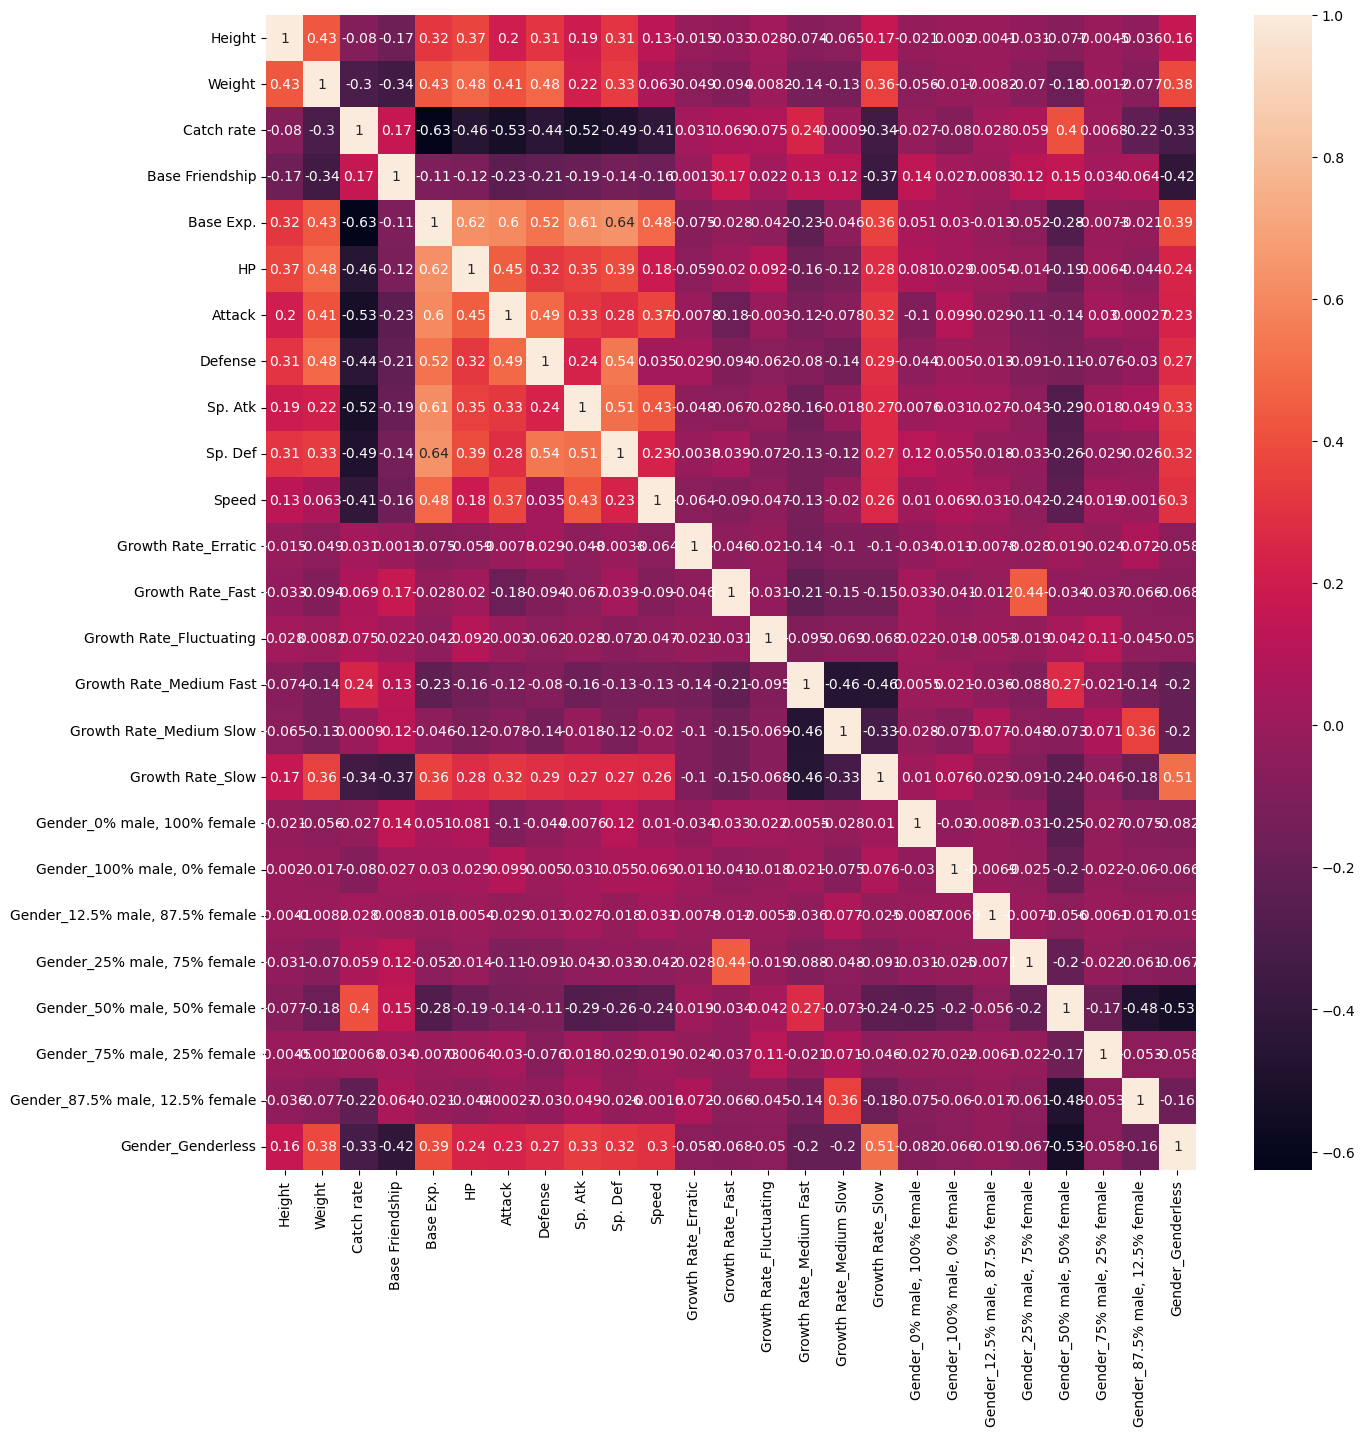

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(corrs, annot=True)
plt.show()

In [21]:
abs(corrs["Catch rate"]).sort_values(ascending=False)

Catch rate                         1.000000
Base Exp.                          0.625858
Attack                             0.527541
Sp. Atk                            0.520596
Sp. Def                            0.488224
HP                                 0.458545
Defense                            0.441571
Speed                              0.414084
Gender_50% male, 50% female        0.404192
Growth Rate_Slow                   0.343252
Gender_Genderless                  0.326837
Weight                             0.303829
Growth Rate_Medium Fast            0.239034
Gender_87.5% male, 12.5% female    0.219453
Base Friendship                    0.166508
Height                             0.080413
Gender_100% male, 0% female        0.080321
Growth Rate_Fluctuating            0.074954
Growth Rate_Fast                   0.068584
Gender_25% male, 75% female        0.058619
Growth Rate_Erratic                0.031256
Gender_12.5% male, 87.5% female    0.028161
Gender_0% male, 100% female     

In [22]:
df["Catch rate"].value_counts()

Catch rate
45     311
190     92
255     86
3       75
75      71
120     67
60      57
90      49
30      33
200     21
25      19
225     14
180     14
50      14
100     11
10      11
150     10
127      7
5        6
140      6
235      6
70       5
6        4
125      3
80       3
55       3
65       3
130      2
15       2
220      2
170      2
205      1
155      1
35       1
160      1
20       1
Name: count, dtype: int64

In [23]:
df=pd.get_dummies(df,drop_first=True)

In [24]:
# Step 1: Get the data (NOTE: this is the original dataframe, not the one used for the correlations)
X = df.drop("Catch rate", axis=1)
y = df["Catch rate"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)

(811, 1035) (203, 1035)


In [25]:
scaler = StandardScaler()
x_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.fit_transform(X_test)

In [26]:
rf = RandomForestRegressor(random_state=42)

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20],     # Maximum depth
    'min_samples_split': [2, 5, 10], # Minimum number of samples for split
    'min_samples_leaf': [1, 2, 4]    # Minimum number of instances for a leaf node
}

In [27]:
# Defining GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Training the model
grid_search.fit(X_train, y_train)

# Choosing the best hyperparameters
best_rf = grid_search.best_estimator_

# Prediction on test data
y_pred = best_rf.predict(X_test)

In [28]:
# Evaluating model performance (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"RMSE (Root Mean Squared Error): {rmse}")

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
RMSE (Root Mean Squared Error): 48.20775137592749


In [31]:
import pickle

filename = 'final_model2.h5'
pickle.dump(grid_search, open(filename, 'wb'))